# Projet name : students mark prediction
here total 8 columns of the data as "gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course","math_score","reading_score","writing_score". 


In [1]:
# import librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r"G:\VS CODE\students_marks-24\data\stud.csv"
df = pd.read_csv(path)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
for col in df.describe(include='object').columns:
      print(col)
      print(df[col].unique())
      print('-'*50)

gender
['female' 'male']
--------------------------------------------------
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
lunch
['standard' 'free/reduced']
--------------------------------------------------
test_preparation_course
['none' 'completed']
--------------------------------------------------


In [8]:
cat_features = df.select_dtypes(include='object')
num_features = df.select_dtypes(include='number')

print(f'Categorical Features: {list(cat_features.columns)}')
print(f'Numeric Features: {list(num_features.columns)}')

Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numeric Features: ['math_score', 'reading_score', 'writing_score']


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## EDA

In [10]:
# create two new column total and average

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = (df['total_score']/3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [11]:
num_students_with_full_score_math = df[df['math_score'] == 100].shape[0]
num_students_with_full_score_reading = df[df['reading_score'] == 100].shape[0]
num_students_with_full_score_writing = df[df['writing_score'] == 100].shape[0]
print(f'The number of students who scored 100 in math: {num_students_with_full_score_math}')
print(f'The number of students who scored 100 in reading: {num_students_with_full_score_reading}')
print(f'The number of students who scored 100 in writing: {num_students_with_full_score_writing}')


The number of students who scored 100 in math: 7
The number of students who scored 100 in reading: 17
The number of students who scored 100 in writing: 14


In [12]:
num_students_with_low_score_math = df[df['math_score'] <= 25].shape[0]
num_students_with_low_score_reading = df[df['reading_score'] <= 25].shape[0]
num_students_with_low_score_writing = df[df['writing_score'] <= 25].shape[0]
print(f'The number of students who scored less than 25 in math: {num_students_with_low_score_math}')
print(f'The number of students who scored less than 25 in reading: {num_students_with_low_score_reading}')
print(f'The number of students who scored less than 25 in writing: {num_students_with_low_score_writing}')

The number of students who scored less than 25 in math: 7
The number of students who scored less than 25 in reading: 4
The number of students who scored less than 25 in writing: 5


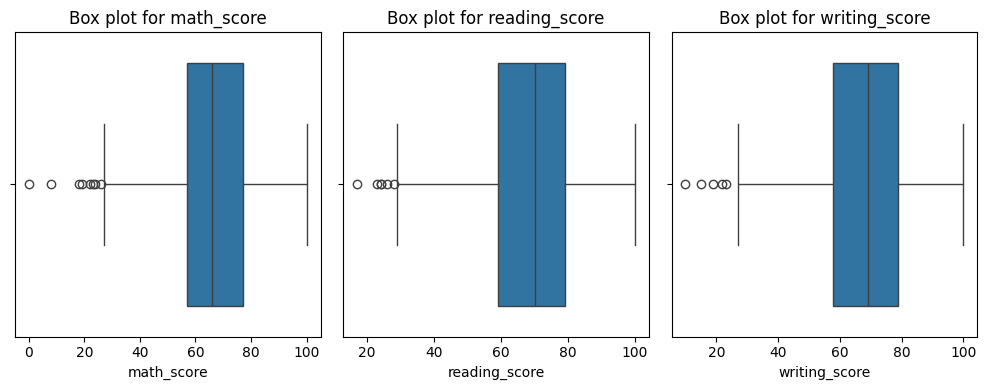

In [13]:
columns_to_plot = ['math_score', 'reading_score', 'writing_score']
plt.figure(figsize=(10,4))

for i, column in enumerate(columns_to_plot,1):
      plt.subplot(1,3,i)
      sns.boxplot(x=df[column])
      plt.title(f"Box plot for {column}")
      
plt.tight_layout()
plt.show()

In [14]:
df["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

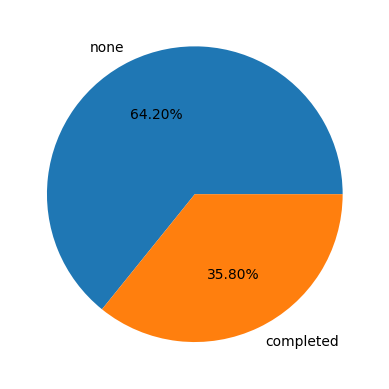

In [15]:
# Get the value counts for the 'test_preparation_course' column
target_col = df["test_preparation_course"].value_counts()

# Plot a pie chart with specified labels
plt.pie(target_col, labels=['none', 'completed'], autopct="%1.2f%%")
plt.show()

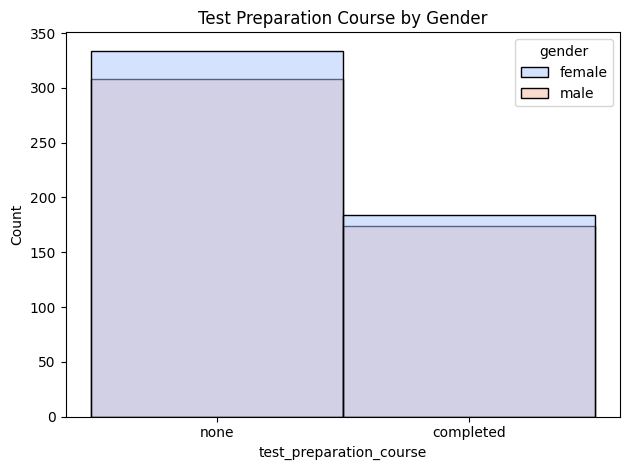

In [16]:
sns.histplot(data=df, x="test_preparation_course", hue='gender', palette="coolwarm")
plt.title("Test Preparation Course by Gender")

plt.tight_layout()  # To prevent subplot overlap
plt.show()


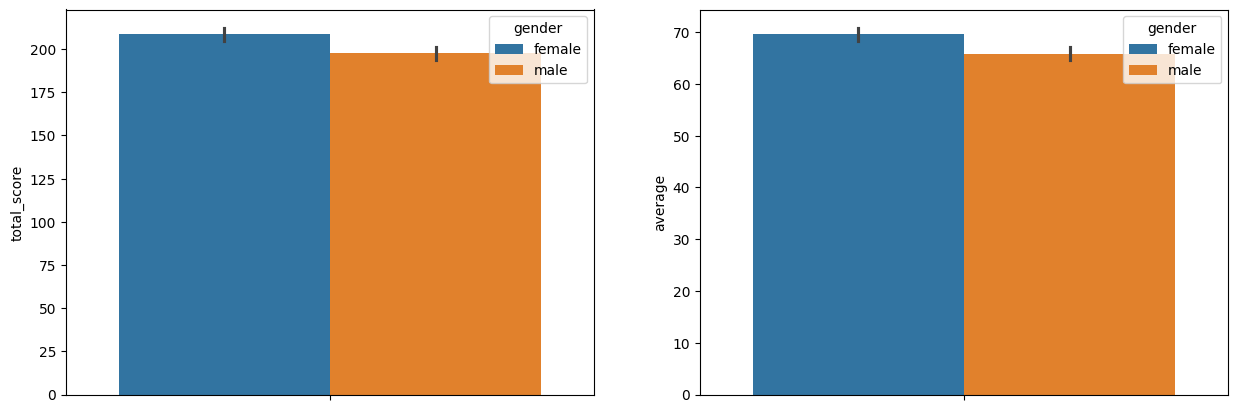

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data=df, y="total_score",hue='gender')

plt.subplot(1,2,2)
sns.barplot(data=df, y="average", hue='gender')

plt.show()

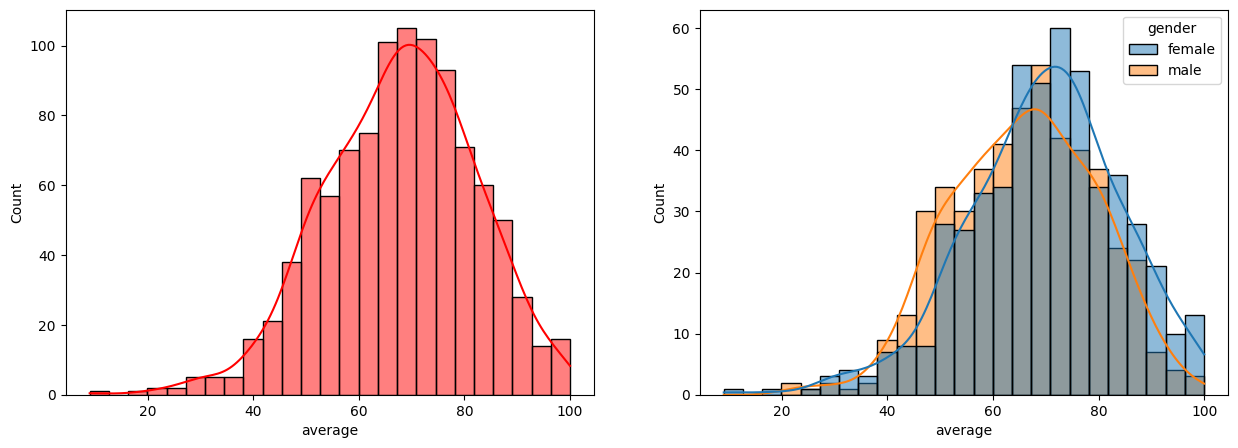

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=df, kde=True, x="average",color='r', bins=25)

plt.subplot(1,2,2)
sns.histplot(data=df, kde=True, x="average", bins=25, hue='gender')

plt.show()

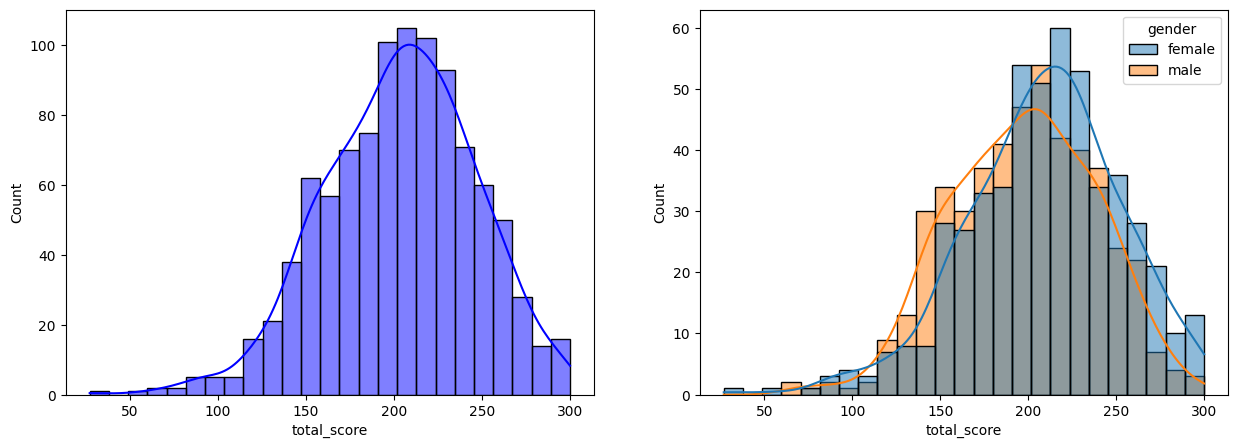

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=df, kde=True, x="total_score",color='b', bins=25)

plt.subplot(1,2,2)
sns.histplot(data=df, kde=True, x="total_score", bins=25, hue='gender')

plt.show()

In [20]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


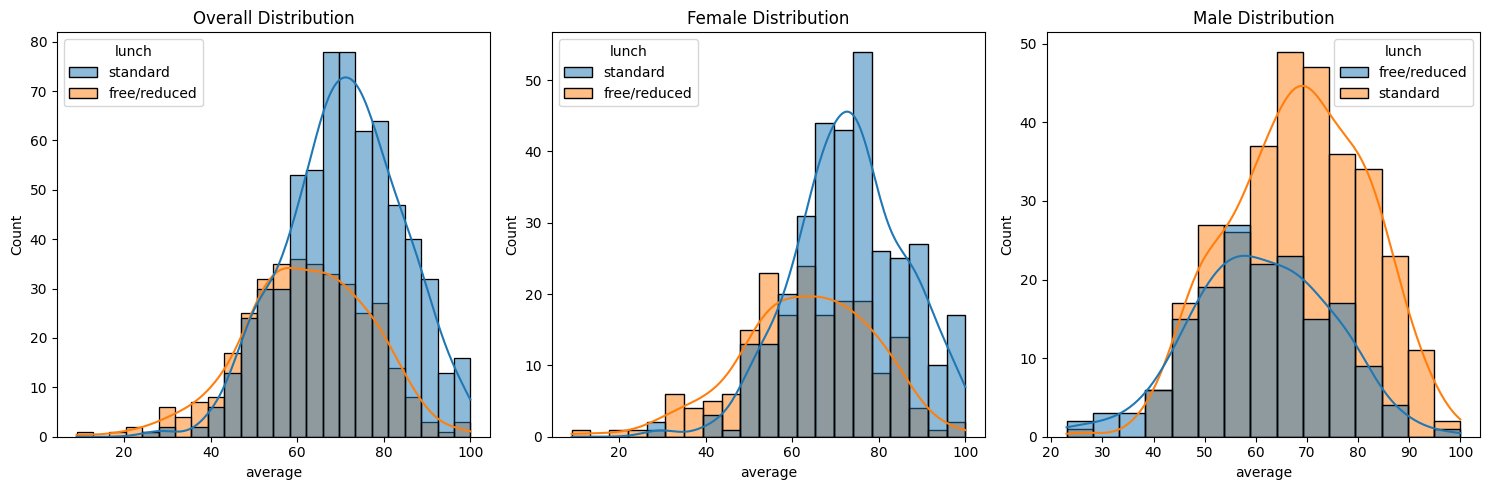

In [21]:
plt.figure(figsize=(15, 5))

# Overall histogram with KDE plot
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("Overall Distribution")

# Female histogram with KDE plot
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title("Female Distribution")

# Male histogram with KDE plot
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title("Male Distribution")

plt.tight_layout()
plt.show()

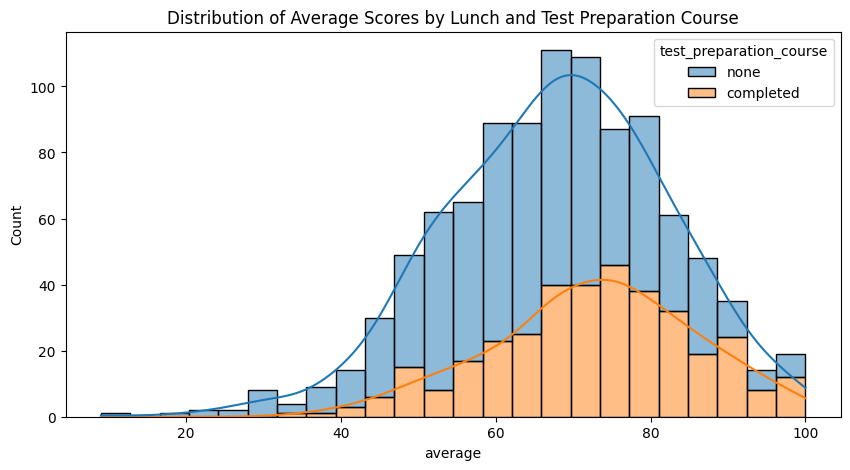

In [22]:
plt.figure(figsize=(10, 5))

# Create a histogram with KDE for 'lunch' and differentiate by 'test_preparation_course'
sns.histplot(data=df, x='average', kde=True, hue='test_preparation_course', multiple='stack')

plt.title("Distribution of Average Scores by Lunch and Test Preparation Course")
plt.show()


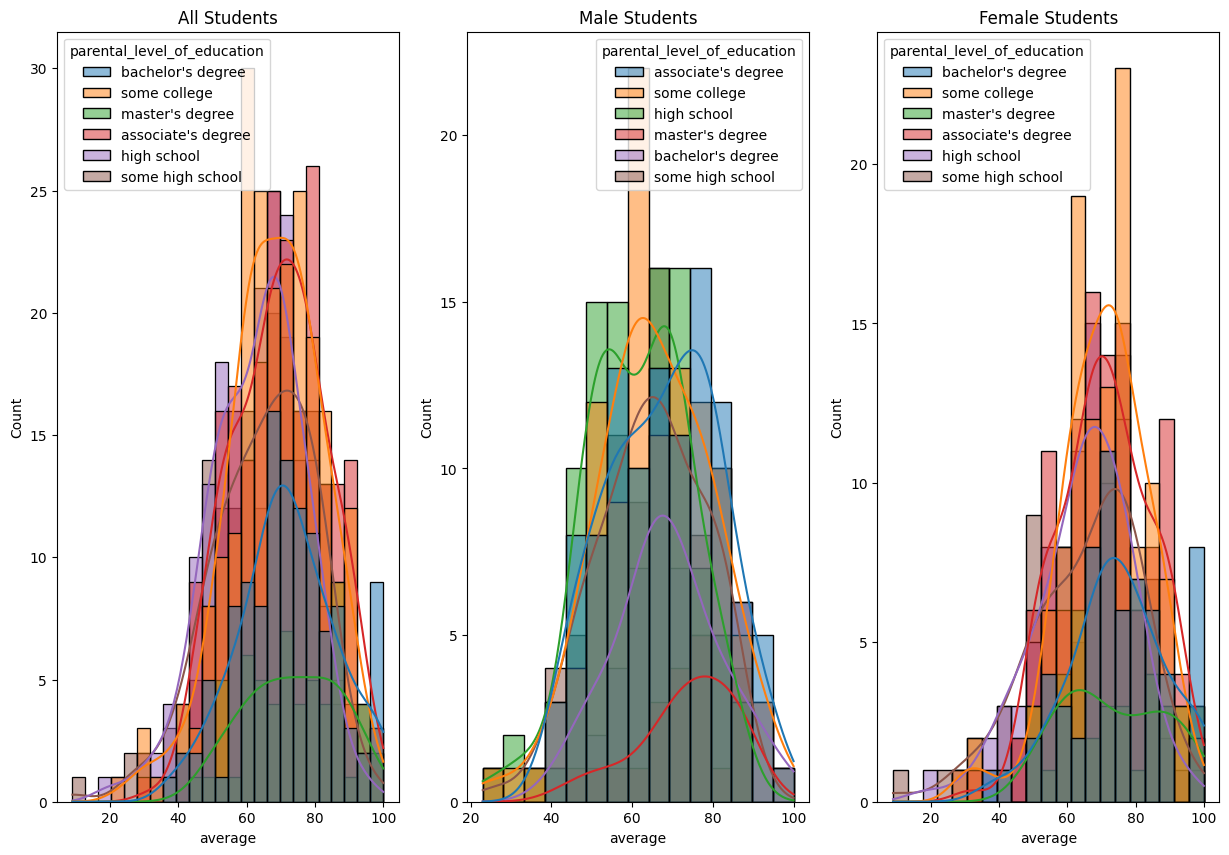

In [23]:
plt.figure(figsize=(15, 10))


plt.subplot(1, 3, 1)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("All Students")

plt.subplot(1, 3, 2)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Male Students")

plt.subplot(1, 3, 3)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Female Students")

plt.show()

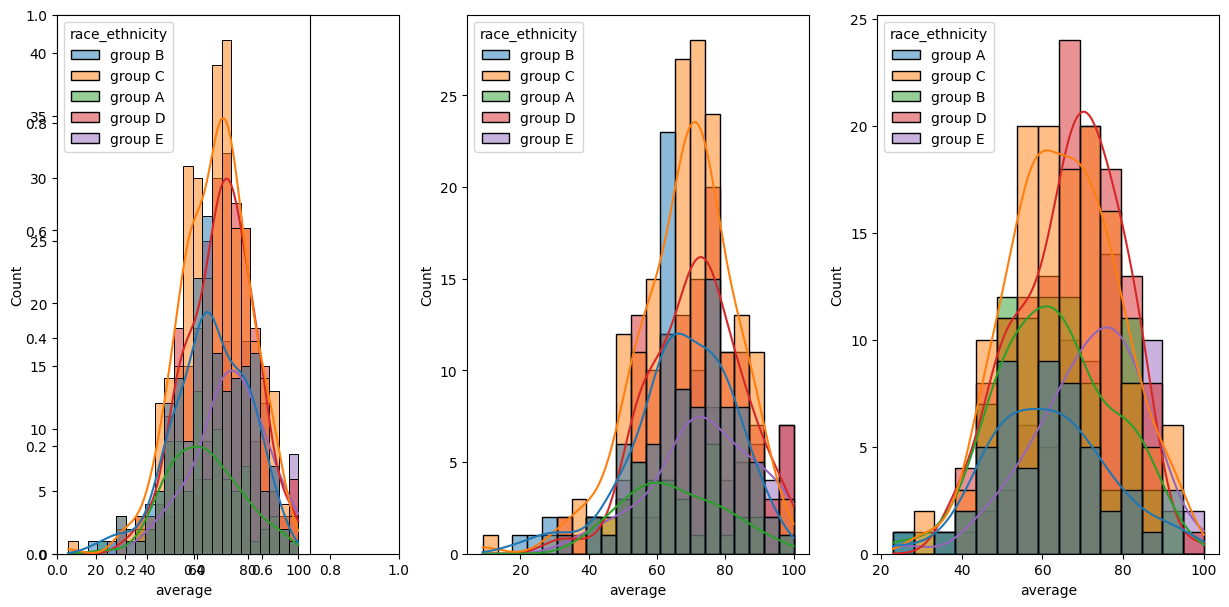

In [24]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(1, 3, 2)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(1, 3, 3)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [25]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
gender_group = (df.groupby('gender')[numeric_columns].mean()).round(2) 
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.63,72.61,72.47,208.71,69.57
male,68.73,65.47,63.31,197.51,65.84


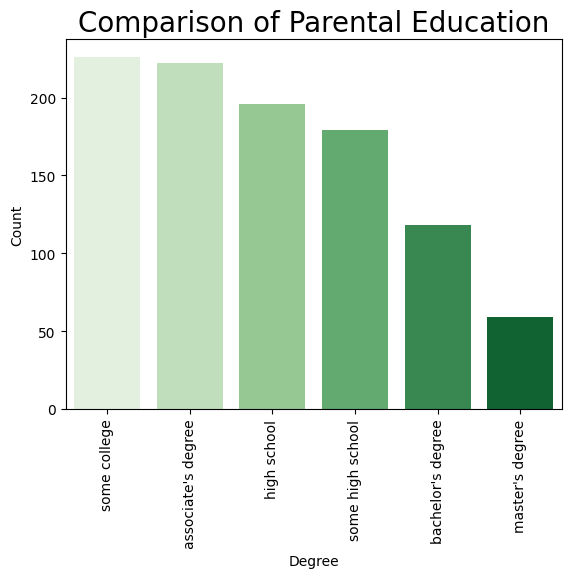

In [26]:
education_counts = df['parental_level_of_education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts, palette='Greens')

plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
columns_to_plot = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

for col in columns_to_plot:
      skewness = df[col].skew()
      if skewness>0:
            skew_type = "right_skewed"
      
      elif skewness<0:
            skew_type = "left_skewed"
            
      else:
            skew_type ="Approximately normal distribution"
      
      print(f"Column={col}: Skewness={skewness} Distribution={skew_type}")

Column=math_score: Skewness=-0.27893514909431694 Distribution=left_skewed
Column=reading_score: Skewness=-0.25910451810923063 Distribution=left_skewed
Column=writing_score: Skewness=-0.28944397150761897 Distribution=left_skewed
Column=total_score: Skewness=-0.2990571175016888 Distribution=left_skewed
Column=average: Skewness=-0.2990424326521194 Distribution=left_skewed


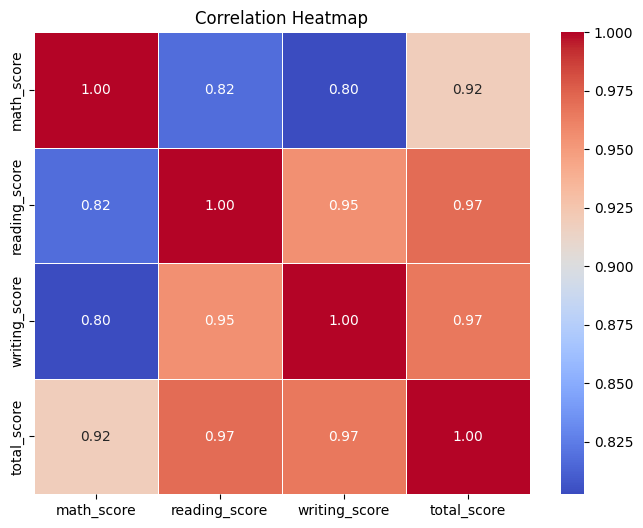

In [28]:

numeric_data = df[['math_score', 'reading_score', 'writing_score','total_score']]

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

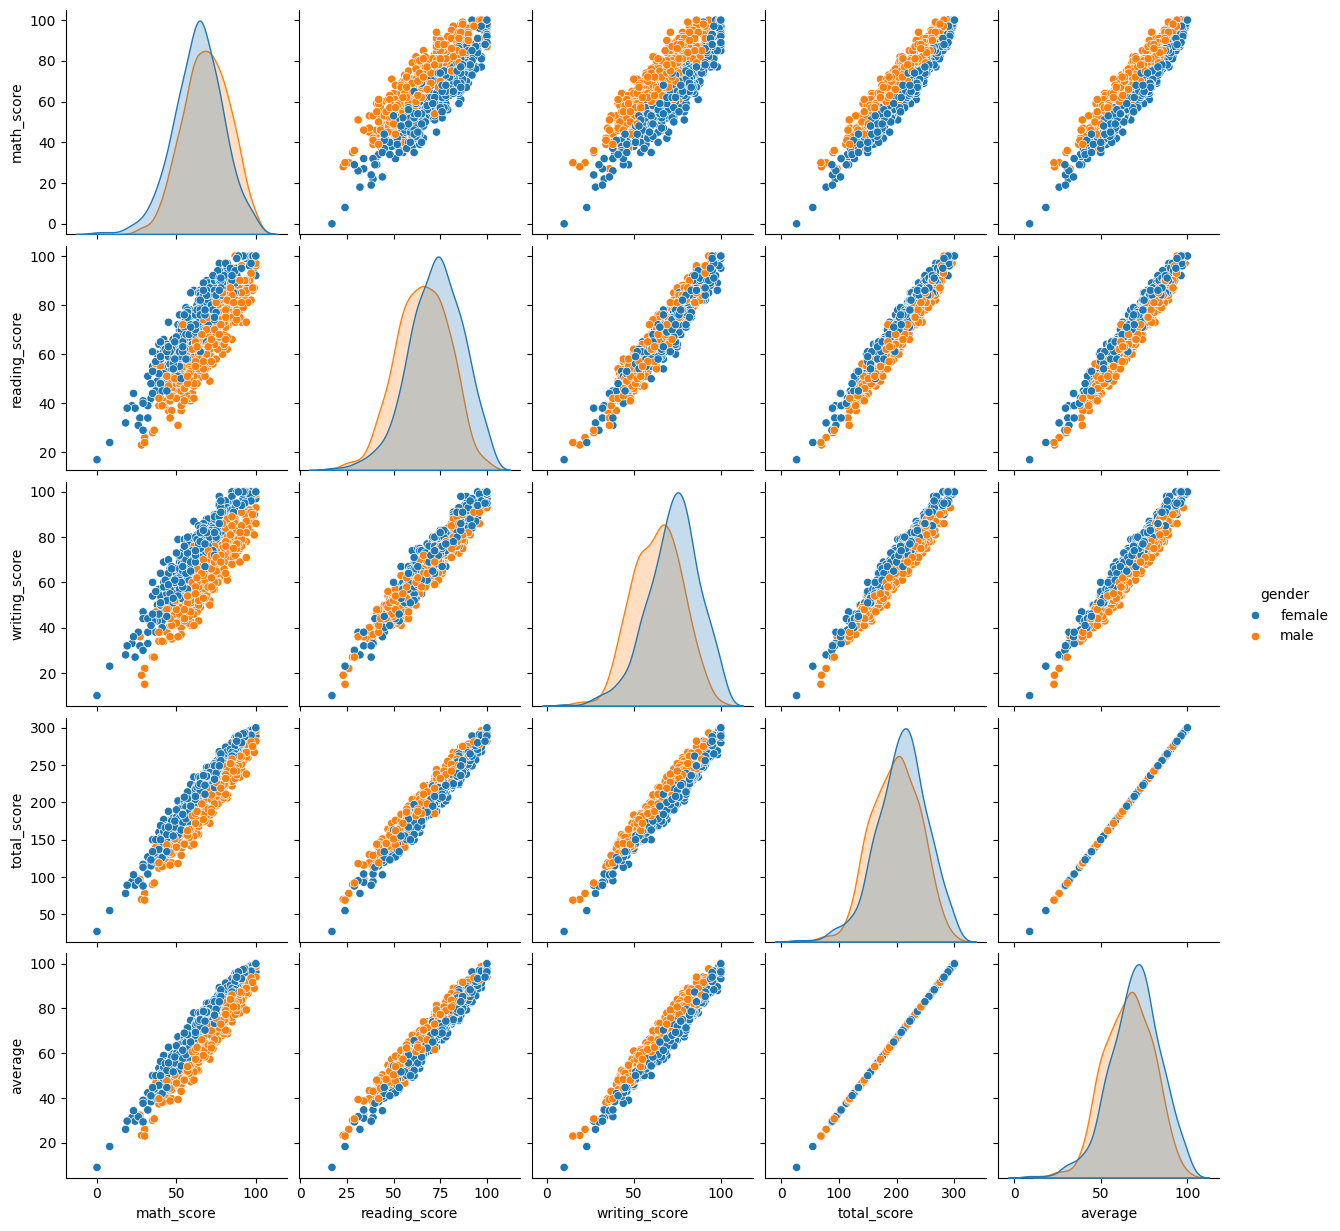

In [29]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [31]:
# Assuming 'test_preparation_course' has values 'none' and 'completed'
df['test_preparation_course'] = df['test_preparation_course'].map({'none': 0, 'completed': 1})

In [32]:
df.to_csv("prepare_train.csv", index=False)